In [5]:
!pip install lux

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.5 MB 31.7 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 62 kB 799 kB/s 
     |████████████████████████████████| 281 kB 43.6 MB/s 
     |████████████████████████████████| 42 kB 872 kB/s 
  Created wheel for lux: filename=lux-0.5.1-py3-none-any.whl size=11979 sha256=cefb2ade1354932e356c629ac351e2ed2faded346900443fffa6b680a4cf2227
  Stored in directory: /root/.cache/pip/wheels/41/6c/3e/dd206ed1c244344b18b396ebd36d1c5e266c53ed73201e20b3
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185620 sha256=6df89997f21e04fbaec942e0d4b026171c630380dbab826c5b9918d5d6badb98
  Stored in directory: /root/.

In [6]:
# !pip install imblearn

In [7]:
# !pip install xgboost

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier

In [8]:
import numpy as np
import pandas as pd
import os,sys
import lux 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [9]:
#load dataset

df = pd.read_csv('parkinsons.csv')
df.head(n=10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
df.head(n=10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
df.shape

(195, 24)

In [12]:
#preprocessing:check null values in dataset
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [14]:
#finding unique values in the columns
for i in df.columns:
  print("**********************************************",i,"***********************************************************")
  print()
  print(set(df[i].tolist()))
  print()

********************************************** name ***********************************************************

{'phon_R01_S18_2', 'phon_R01_S37_6', 'phon_R01_S35_2', 'phon_R01_S02_1', 'phon_R01_S39_1', 'phon_R01_S50_2', 'phon_R01_S32_1', 'phon_R01_S49_4', 'phon_R01_S06_6', 'phon_R01_S20_6', 'phon_R01_S18_3', 'phon_R01_S19_2', 'phon_R01_S33_2', 'phon_R01_S31_4', 'phon_R01_S37_3', 'phon_R01_S06_5', 'phon_R01_S18_6', 'phon_R01_S35_4', 'phon_R01_S04_2', 'phon_R01_S18_1', 'phon_R01_S21_4', 'phon_R01_S35_6', 'phon_R01_S06_4', 'phon_R01_S13_2', 'phon_R01_S42_1', 'phon_R01_S32_2', 'phon_R01_S16_6', 'phon_R01_S35_3', 'phon_R01_S16_3', 'phon_R01_S07_3', 'phon_R01_S18_5', 'phon_R01_S37_2', 'phon_R01_S34_1', 'phon_R01_S22_5', 'phon_R01_S21_3', 'phon_R01_S31_1', 'phon_R01_S04_3', 'phon_R01_S34_2', 'phon_R01_S43_3', 'phon_R01_S26_6', 'phon_R01_S50_5', 'phon_R01_S49_3', 'phon_R01_S33_4', 'phon_R01_S08_2', 'phon_R01_S39_6', 'phon_R01_S02_4', 'phon_R01_S31_2', 'phon_R01_S26_4', 'phon_R01_S18_4', 'pho

In [15]:
temp=df["status"].value_counts()
temp

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

AxesSubplot(0.125,0.125;0.775x0.755)


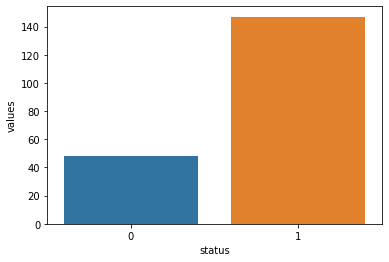

In [16]:
#checklabel imbalance
import matplotlib.pyplot as plt
import seaborn as sns

temp=df["status"].value_counts()
temp_df=pd.DataFrame({'status':temp.index,'values':temp.values})
print(sns.barplot(x='status',y="values",data=temp_df))

In [17]:
temp_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

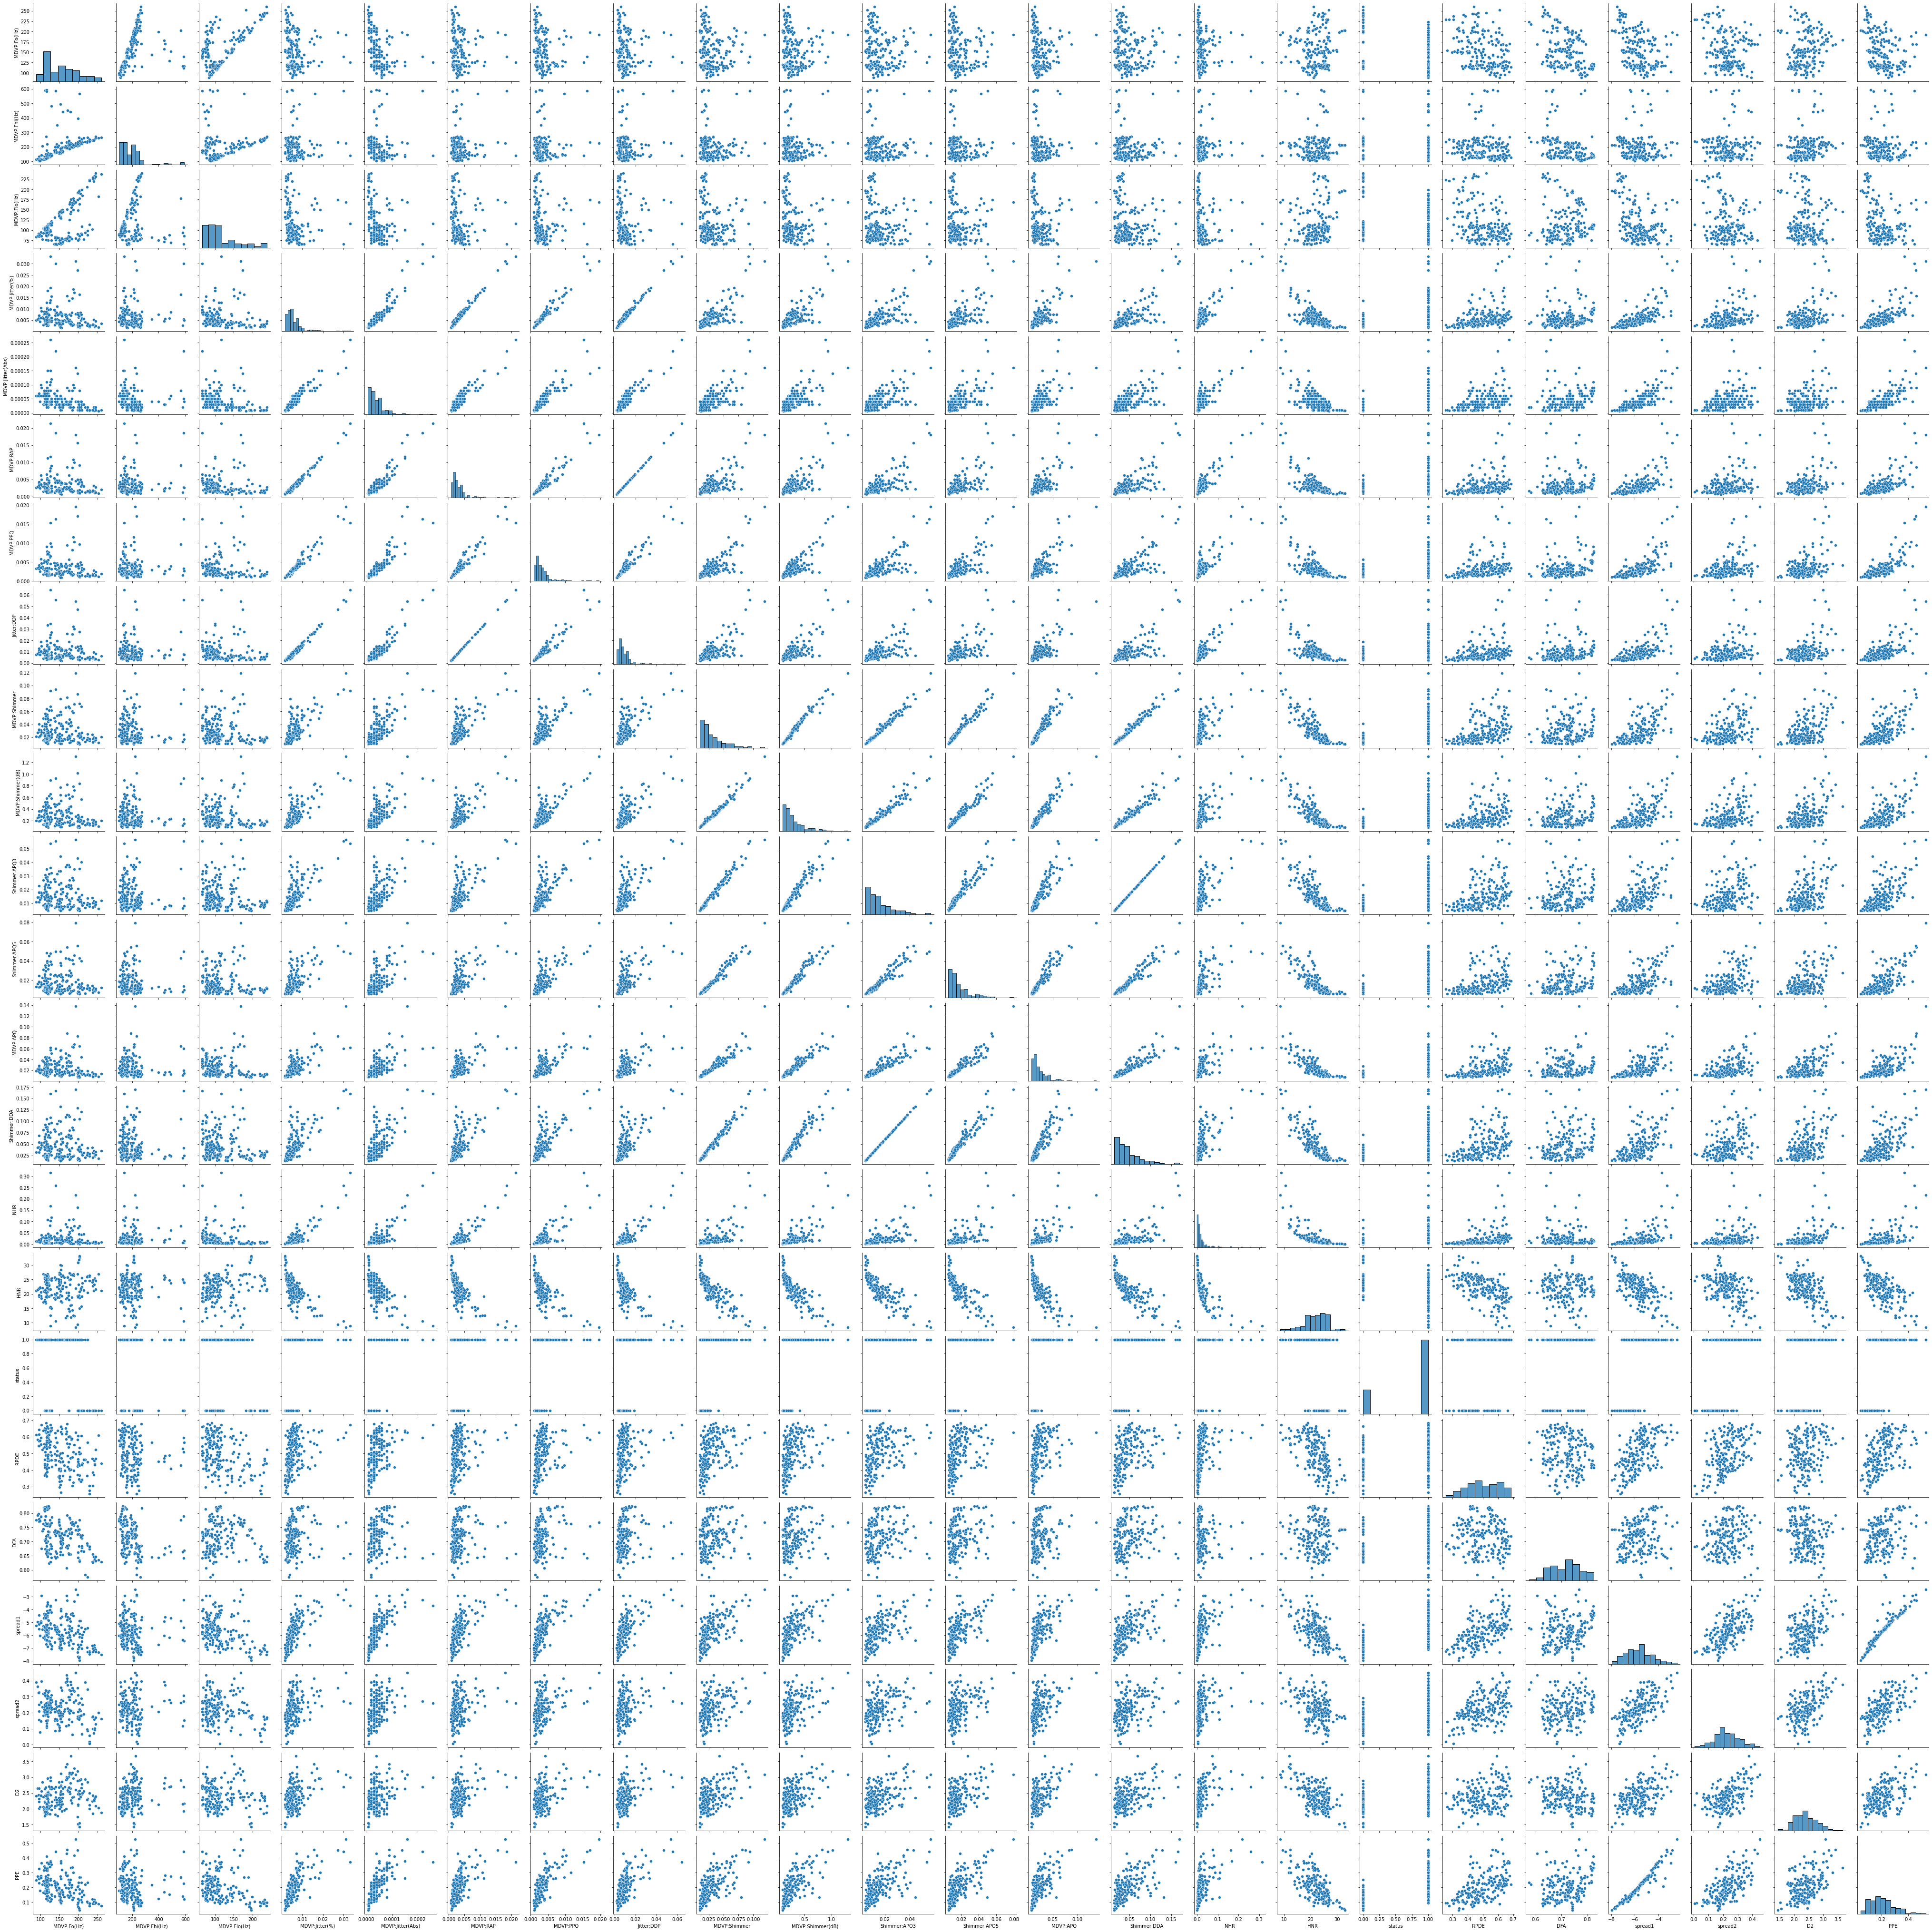

In [18]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


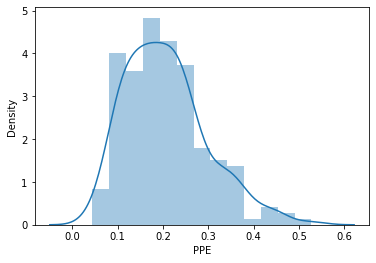

In [19]:
sns.distplot(df["PPE"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


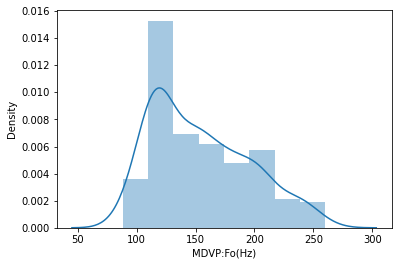

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


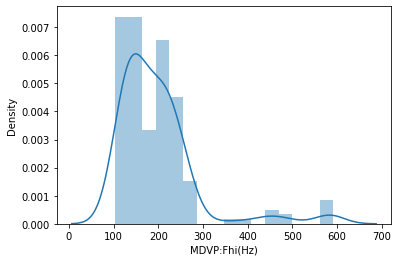

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


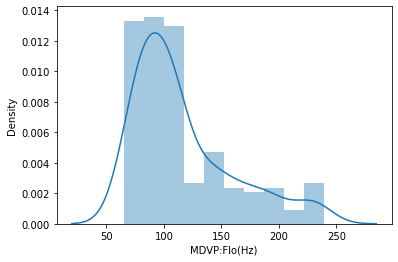

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


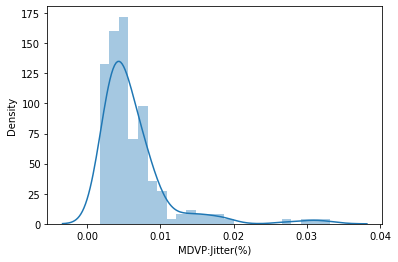

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


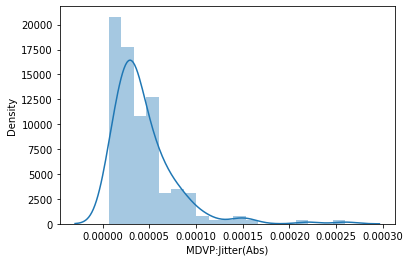

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


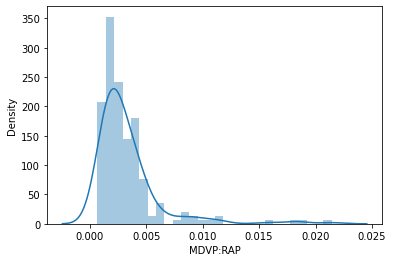

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


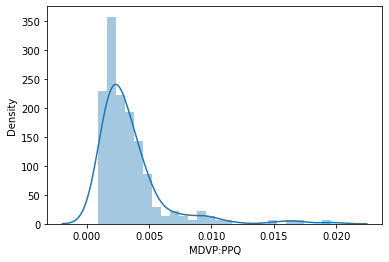

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


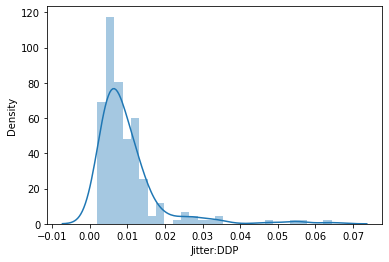

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


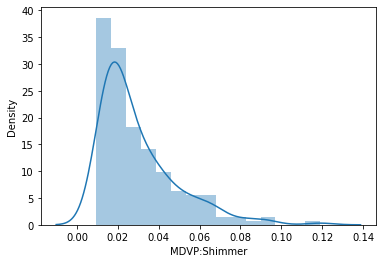

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


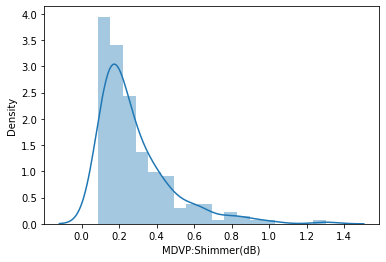

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


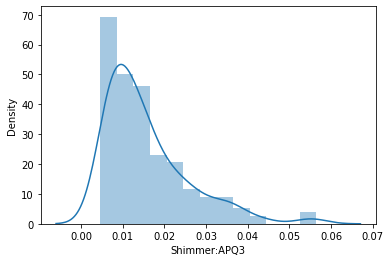

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


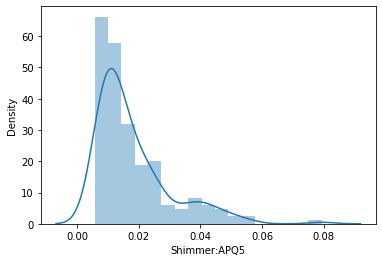

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


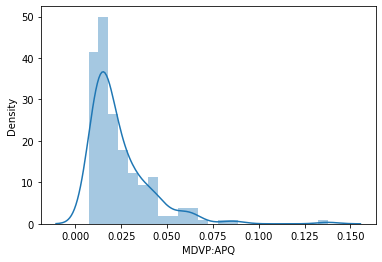

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


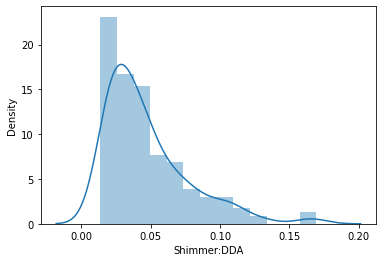

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


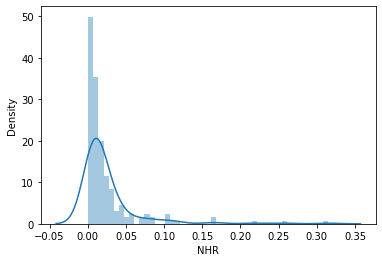

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


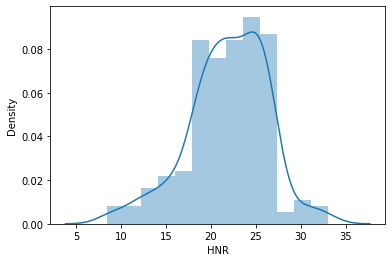

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


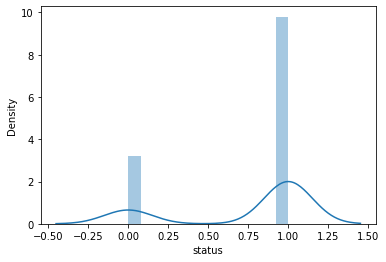

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


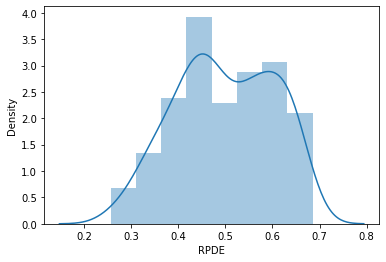

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


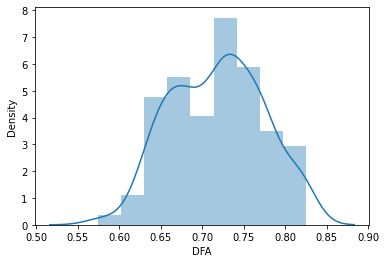

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


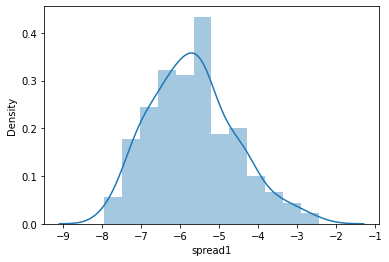

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


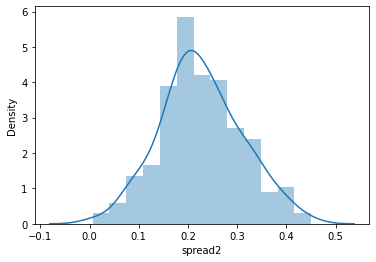

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


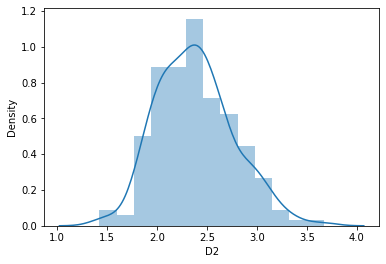

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


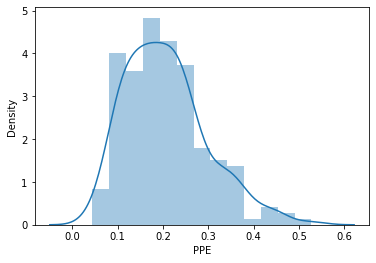

In [20]:
def distplot(col):
  sns.distplot(df[col])
  plt.show()
for i in list(df.columns)[1:]:
  distplot(i)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


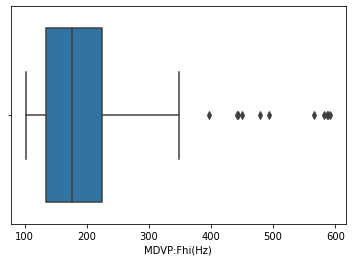

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


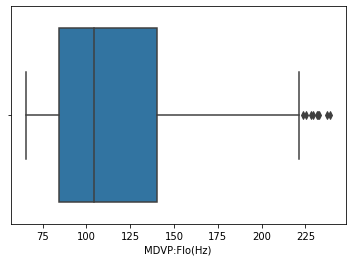

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


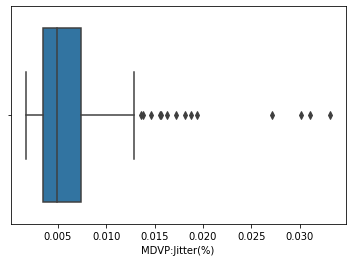

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


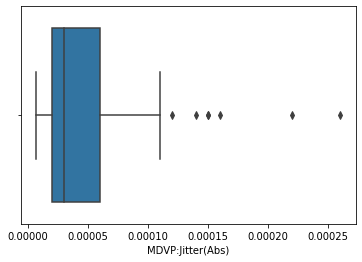

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


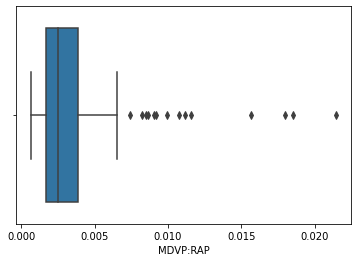

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


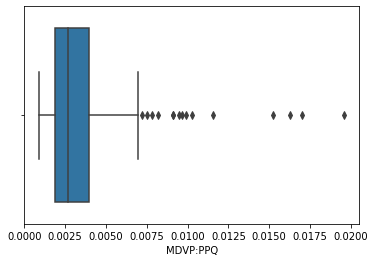

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


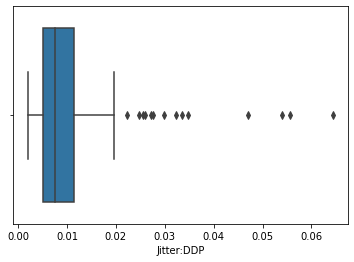

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


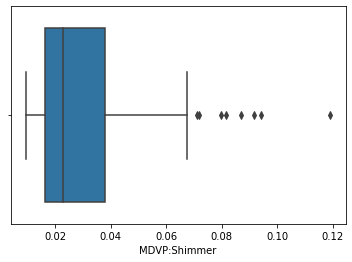

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


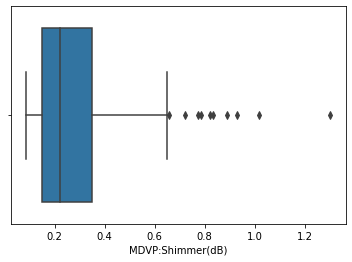

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


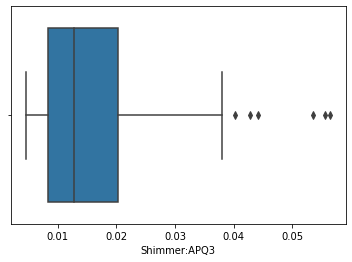

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


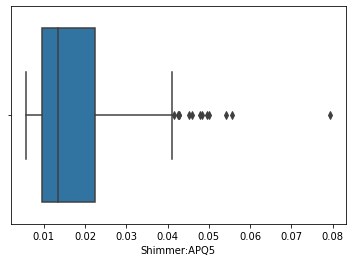

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


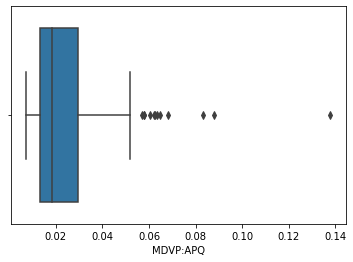

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


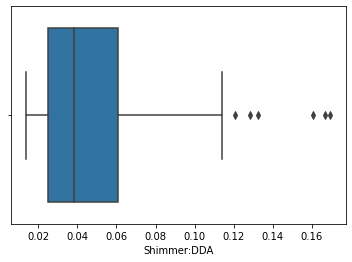

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


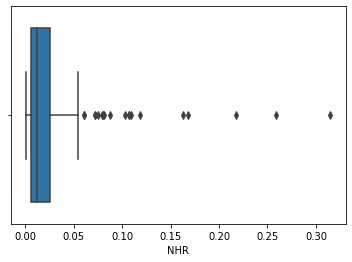

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


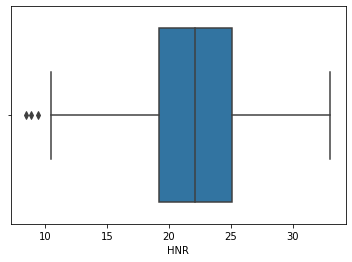

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


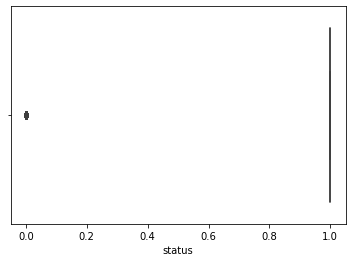

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


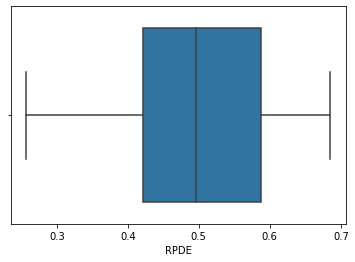

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


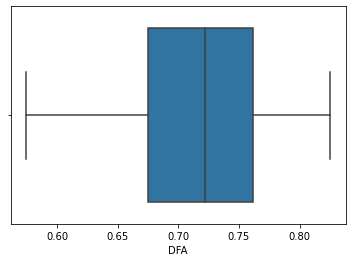

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


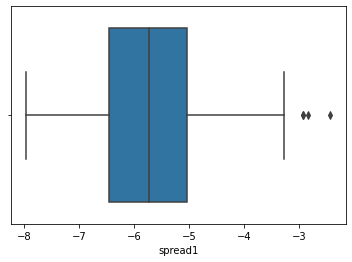

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


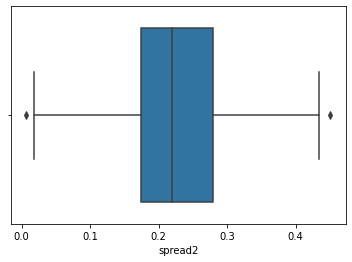

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


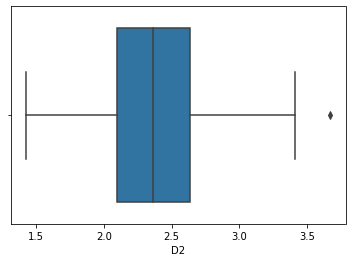

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


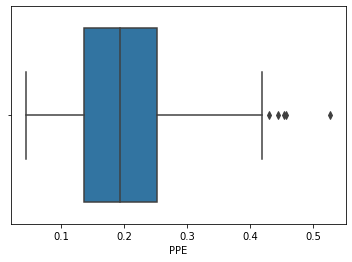

In [21]:
#find the distribution of  data
def boxplots(col):
  sns.boxplot(df[col])
  plt.show()
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
  boxplots(i)

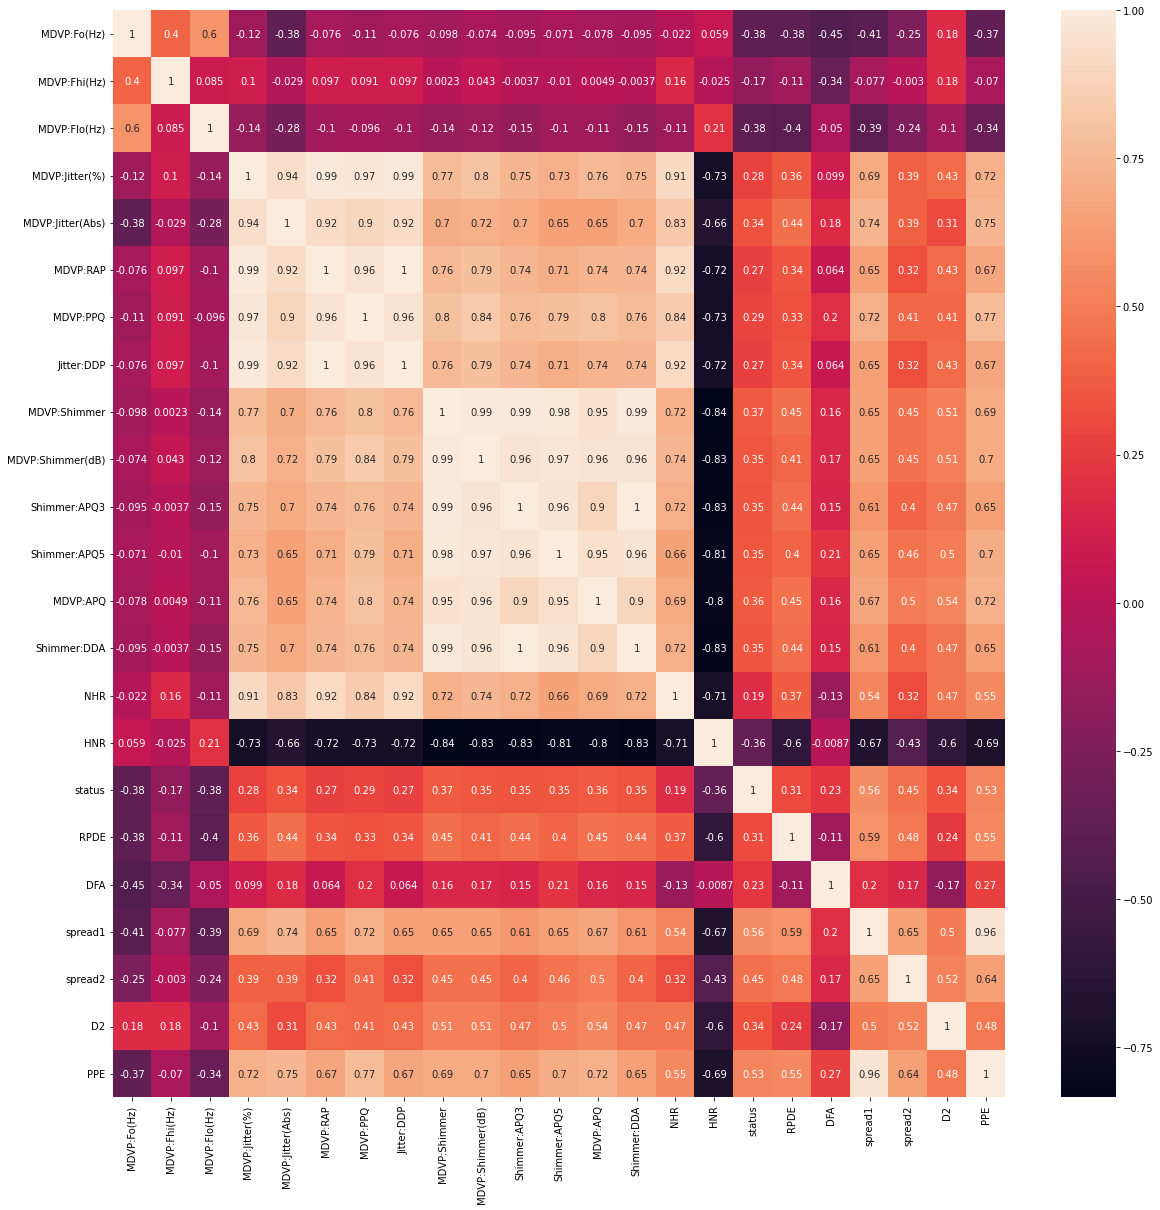

In [22]:
# findingcorelation
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [23]:
#seperateindependent and dependent variablesand drop ic column
x=df.drop(["status","name"],axis=1)
y=df["status"]

In [24]:
#lets detect the label imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))



Counter({1: 147, 0: 48})


In [25]:
# #lets baance the labels
# ros=RandomOverSampler()
# x_ros,y_ros=ros.fit_resample(x,y)
# print(Counter(y_ros))

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_ros, y_ros = sm.fit_resample(x, y)
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [27]:
#initialize the MinMaxScaler and scale the features to between-1 and 1 to normalize them.
#the MinMaxScalar transform features by scaling them a given range
#the fit_transform() method fits tothe data and then transform it. We dont need to scale the labels.
#scale the features to between -1 to 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x_ros)
y=y_ros

In [28]:
#the most import use of pca is to reprent a multivariate data table as a smaller set of variables(summary indices)
#in order to  observe trends,jumps,clusters and outliers.
#this overview may uncover the relationships between observations and variables and among the variables

#applying feature enginnering
#applying pca
#the code below .95 for no of componets parameter.
#it meansthat scikitlearn choose the minimum no of pricipal components such that 95% of the varianceis retained .
from sklearn.decomposition import PCA
pca=PCA(.95)
X_PCA=pca.fit_transform(x)
print(x.shape)
print(X_PCA.shape)
#thus we need 8 columns to keep 95% of the variance

(294, 22)
(294, 8)


In [57]:
#now wesplit the data into traning and testing sets keeping 20% of the data for testing.
#Split the data set
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2,random_state=9)

                        Method used  Accuracy
0               Logistic Regression  0.762712
1                     Decision Tree  0.932203
2   Random Forest(information gain)  0.949153
3             RandomForest(Entropy)  0.983051
4                               SVM  0.898305
5                               KNN  0.932203
6                               gnb  0.847458
7                               bnb  0.864407
8                            voting  0.847458
AxesSubplot(0.125,0.125;0.775x0.755)


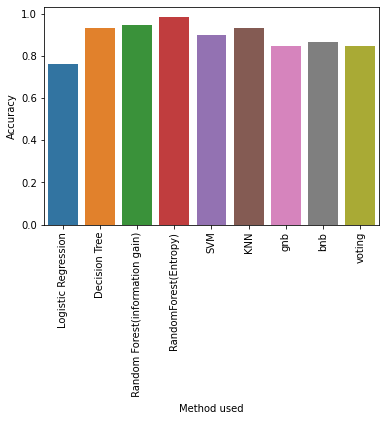

In [58]:
#applying the algorithm
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
list_met=[]
list_accuracy=[]
#applying all thealgoritms 
#apply logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train,y_train)
#prediction
y_pred=classifier.predict(x_test)
#accuracy
accuracy_LR=accuracy_score(y_test,y_pred)

#apply decission tree

from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train,y_train)
#prediction
y_pred2=classifier2.predict(x_test)
#accuracy
accuracy_DT=accuracy_score(y_test,y_pred2)



#APPLY RANDOM FOREST CRITERIA-INFORMATION GAIN
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train,y_train)
#prediction
y_pred3=classifier3.predict(x_test)
#accuracy
accuracy_RFI=accuracy_score(y_test,y_pred3)


#apply random forest criteria entropy


from sklearn.ensemble import RandomForestClassifier
classifier4=RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train,y_train)
#prediction
y_pred4=classifier4.predict(x_test)
#accuracy
accuracy_RFE=accuracy_score(y_test,y_pred4)



#APPLY SVM
from sklearn.svm import SVC
model_svm=SVC(cache_size=100)
svm=model_svm.fit(x_train,y_train)
#prediction
y_pred5=model_svm.predict(x_test)
#accuracy
accuracy_svc=accuracy_score(y_test,y_pred5)



#apply knn
from sklearn.neighbors import KNeighborsClassifier
model_knn3=KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
#prediction test set n=3
pred_knn3=model_knn3.predict(x_test)
#accuracy
accuracy_SVM=accuracy_score(y_test,pred_knn3)

#APPLYING Gaussian naives bayes classifier

from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb=gnb.fit(x_train,y_train)
#prediction test set n=3
pred_gnb=gnb.predict(x_test)
#accuracy
accuracy_GNB=accuracy_score(y_test,pred_gnb)


#APPLYING bernollinaive bayes classifier

from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB()
bnb=model.fit(x_train,y_train)
#prediction test set n=3
pred_bnb=model.predict(x_test)
#accuracy
accuracy_BNB=accuracy_score(y_test,pred_bnb)





#combining all the above using voting classifier

from sklearn.ensemble import VotingClassifier
evc=VotingClassifier(estimators=[('lr',lr),('rfi',rfi),('rfe',rfe),('DT',dt),('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',flatten_transform=True)
model_evc=evc.fit(x_train,y_train)
#prediction
pred_evc=evc.predict(x_test)
#accuracy
accuracy_evc=accuracy_score(y_test,pred_gnb)


list1=['Logistic Regression','Decision Tree',' Random Forest(information gain)','RandomForest(Entropy)','SVM','KNN','gnb','bnb','voting']
list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

df_Accuracy=pd.DataFrame({'Method used':list1,'Accuracy':list2})
print(df_Accuracy)
chart=sns.barplot(x="Method used",y="Accuracy",data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)












In [59]:
#initialize an XGBClassifier and train the model
#this classsifies using extreme gradient boosting algorithms for mordern data science problem
#it falls under the category ofensemble learning in ML
#where er train and predict using many models to produce one superior output
#train the model


In [60]:
from xgboost import XGBClassifier
model_xg=XGBClassifier()
model_xg.fit(x_train,y_train)

XGBClassifier()

In [61]:
#finally generate y_pred(prediced values for x testandcalculate the accuracy of the model)
#PRINT IT OUT 
#CALCULATE THE ACCURACY
y_pred=model_xg.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

94.91525423728814


In [62]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [63]:
from sklearn.metrics import f1_score
f1_score(y_test,model_xg.predict(x_test),average='binary')

0.9491525423728815

In [64]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,model_xg.predict(x_test)))
print('Confusion Matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.93      0.97      0.95        29

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

Confusion Matrix:
[[28  2]
 [ 1 28]]


In [65]:
for i in list3:
  print("******************************************************",i,"*******************************")
  print(classification_report(y_test,i.predict(x_test)))
  print('Confusion Matrix:')
  cm=confusion_matrix(y_test,i.predict(x_test))
  print(cm)
  print()



****************************************************** LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') *******************************
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.76      0.76      0.76        29

    accuracy                           0.76        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.76      0.76      0.76        59

Confusion Matrix:
[[23  7]
 [ 7 22]]

****************************************************** DecisionTreeClassifier(random_state=14) *******************************
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.96      0.90      0.93        29

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59

Confusion Matrix:
[[29  1]
 [ 3 2

In [54]:
#visualizing performance with roc
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
def plot_roc(model,x_test,y_test):
  #calculate the fpr and tpr of all threshold of the classifications
  probabilities=model.predict_proba(np.array(x_test))
  predictions=probabilities
  fpr,tpr,threshold=roc_curve(y_test,predictions[:,1])
  roc_auc=auc(fpr,tpr)

  plt.title('reciever operating characterstics')
  plt.plot(fpr,tpr,'b',label='AUC= %0.2f' % roc_auc)
  plt.legend(loc='lower right')
#   plt.plot([0,1][0,1],'r--')
  plt.plot(0,1,'r--')  
#   plt.xlim([0,1])
  plt.xlim(0,1)
#   plt.ylim([0,1])
  plt.ylim(0,1)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()



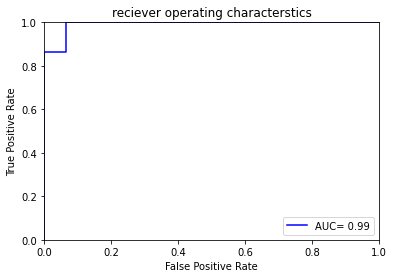

In [66]:
plot_roc(model_xg,x_test,y_test)


_________________________ROC FOR Logistic Regression +PCA________________---


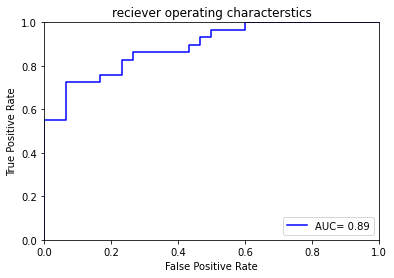



_________________________ROC FOR Decision Tree +PCA________________---


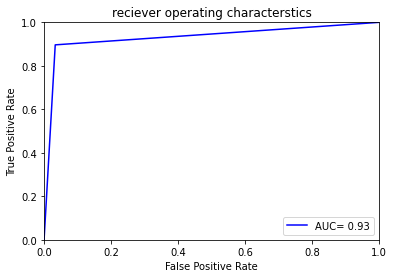



_________________________ROC FOR  Random Forest(information gain) +PCA________________---


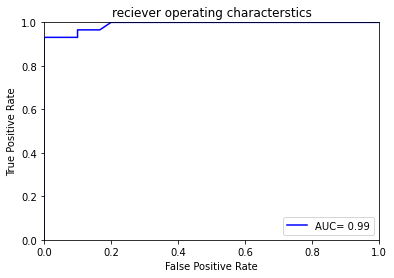



_________________________ROC FOR RandomForest(Entropy) +PCA________________---


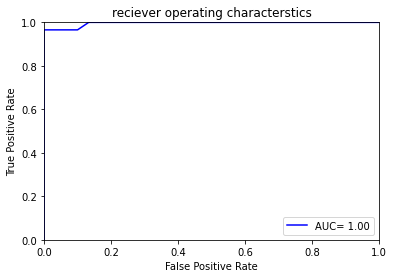



_________________________ROC FOR SVM +PCA________________---
roc not valid

_________________________ROC FOR KNN +PCA________________---


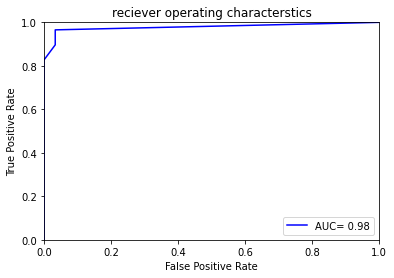



_________________________ROC FOR gnb +PCA________________---


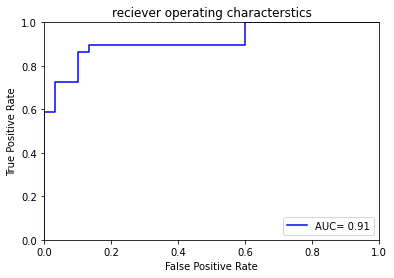



_________________________ROC FOR bnb +PCA________________---


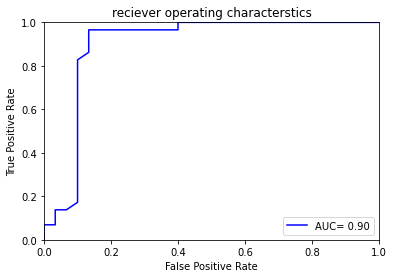

In [67]:
for i in range(0,len(list3)):
  try:
    print()
    print("_________________________ROC FOR",list1[i],"+PCA________________---")
    plot_roc(list3[i],x_test,np.array(y_test))
    print()
  except:
    print("roc not valid")